## Applied Numerical Analysis for Engineers – Final Exam.

#### 10. Partial Differential Equations

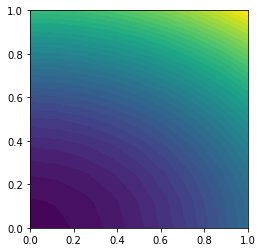

In [1]:
"""
FEniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.
  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary
  u_D = 1 + x^2 + 2y^2
    f = -6
"""

from __future__ import print_function
from dolfin import *

import numpy as np

# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 +x[0]*x[0] +2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)

a = dot(grad(u), grad(v))*dx
L = f*v*dx

u = Function(V)
solve(a == L, u, bc)

# Plot solution
plot(u);